In [16]:
import base64
import pandas as pd
from IPython.display import HTML, display
from sentence_transformers import SentenceTransformer

In [17]:
df = pd.read_parquet(r'../data/memes.parquet', columns=['name', 'local_path'])
df['local_path'] = df['local_path'].apply(lambda x: x['bytes'])
df['name'] = df['name'].apply(lambda x: x.lower().replace(' meme', ''))
df.drop_duplicates(subset=['name'], keep='first', inplace=True)

df

,name,local_path
0,drake hotline bling,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,two buttons,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,distracted boyfriend,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,bernie i am once again asking for your support,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,left exit 12 off ramp,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
...,...,...
2315,insanity puppy,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2316,scumbag redditor,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2317,friend zone fiona,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2318,crazy girlfriend praying mantis,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [18]:
def bytes_to_html_image(byte_data, width=100):
    img_str = base64.b64encode(byte_data).decode('utf-8')
    return f'<img src="data:image/jpeg;base64,{img_str}" width="{width}">'

def display_df_with_images(df, n_rows=10, image_width=100):
    display_df = df[:n_rows].copy()
    display_df['image_preview'] = display_df['local_path'].apply(lambda x: bytes_to_html_image(x, width=image_width))
    display(HTML(display_df.drop('local_path', axis=1).to_html(escape=False, index=False)))

name,image_preview
drake hotline bling,
two buttons,
distracted boyfriend,

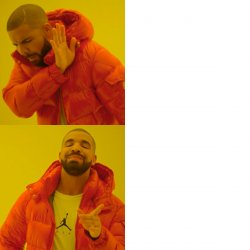
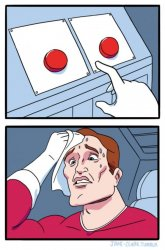
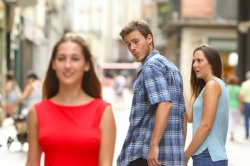

In [19]:
display_df_with_images(df, n_rows=3, image_width=150)

In [20]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', cache_folder=r'..\models', device='cuda')

In [21]:
texts = df['name'].tolist()
embeddings = model.encode(texts)

In [22]:
df['embedding'] = embeddings.tolist()

name,embedding,image_preview
drake hotline bling,"[-0.2613982856273651, -0.08716241270303726, -0.07286039739847183, -0.20801657438278198, -0.21211479604244232, -0.31109878420829773, 0.01374192163348198, -0.04285335913300514, -0.11538014560937881, 0.1708764135837555, -0.1557585746049881, 0.11441884189844131, 0.15252462029457092, -0.19116508960723877, 0.13861536979675293, 0.2167115956544876, 0.14315325021743774, -0.01217440515756607, 0.11199081689119339, 0.04801693931221962, 0.03699810802936554, 0.08932006359100342, -0.09283100813627243, 0.052378177642822266, -0.19912263751029968, -0.22459819912910461, 0.2044798880815506, -0.04656407982110977, -0.21075424551963806, -0.1579405665397644, 0.22791340947151184, 0.06385611742734909, 0.10751958191394806, 0.06689287722110748, 0.18346373736858368, 0.10593630373477936, 0.10728193819522858, 0.08516046404838562, -0.18907108902931213, -0.26255685091018677, 0.11452966928482056, -0.19766373932361603, -0.08180666714906693, 0.053058356046676636, -0.14508822560310364, 0.0034751221537590027, -0.4110494554042816, 0.1342904269695282, -0.04388079047203064, -0.2541934549808502, -0.03433138132095337, 0.15054883062839508, -0.06375472247600555, 0.14260749518871307, 0.10032082349061966, 0.17019063234329224, -0.09928128868341446, 0.42945051193237305, -0.13492266833782196, 0.34146183729171753, -0.14391392469406128, -0.05200529098510742, -0.18467214703559875, -0.06786598265171051, -0.07571414113044739, 0.2102184295654297, -0.2010124772787094, -0.22215551137924194, 0.10156632214784622, -0.30248209834098816, -0.2862800359725952, -0.35822826623916626, -0.20833155512809753, 0.15318076312541962, -0.0943489670753479, 0.38770169019699097, -0.2760126292705536, -0.13871721923351288, 0.013515520840883255, 0.09767214953899384, 0.05683785304427147, -0.38468605279922485, 0.0381871797144413, 0.31765317916870117, 0.09333642572164536, -0.05101607367396355, 0.11937619000673294, -0.12683889269828796, -0.12416279315948486, 0.016185035929083824, -0.18107862770557404, 0.03936461731791496, 0.05603088065981865, 0.0945889800786972, -0.1419057846069336, -0.04301916062831879, -0.22634144127368927, -0.38173049688339233, -0.3401373624801636, 0.488701730966568, ...]",
two buttons,"[-0.5479006767272949, 0.16072261333465576, -0.3024655878543854, 0.004800370894372463, -0.19437077641487122, 0.06866508722305298, 0.15241055190563202, -0.12294050306081772, -0.04727589339017868, -0.03888659551739693, 0.3911345601081848, 0.3496529161930084, 0.051446933299303055, 0.009976105764508247, 0.15177077054977417, 0.1580810844898224, -0.3266908526420593, 0.24449029564857483, 0.0961056500673294, 0.11781295388936996, 0.46852725744247437, -0.6473699808120728, -0.10681185871362686, 0.05920819565653801, -0.4988035261631012, 0.1343717873096466, -0.5471217036247253, 0.15260592103004456, 0.33072930574417114, -0.30328887701034546, 0.15351396799087524, 0.0589202456176281, -0.1978568434715271, -0.09685991704463959, 0.17214085161685944, 0.044649604707956314, 0.09968607127666473, -0.05993345379829407, 0.033455461263656616, -0.15725311636924744, -0.14407965540885925, -0.42402786016464233, 0.21645978093147278, -0.2908812165260315, 0.2435312569141388, -0.13423040509223938, 0.007570883724838495, 0.4773147702217102, 0.46217483282089233, -0.07294614613056183, 0.08826757967472076, -0.17230185866355896, -0.05805324390530586, -0.09895168244838715, 0.30182793736457825, 0.3350750803947449, -0.3692232072353363, 0.63249272108078, -0.29249173402786255, 0.5442966222763062, 0.004736022558063269, -0.5233690142631531, -0.38598141074180603, 0.5124467611312866, 0.20079556107521057, 0.17741981148719788, -0.5364465713500977, -0.2710641026496887, -0.4072984755039215, 0.08494645357131958, -0.16432511806488037, -0.4803018569946289, 0.2909926772117615, -0.2996579110622406, 0.5706239342689514, -0.748512864112854, -0.6835479140281677, -0.04459911957383156, -0.12659072875976562, 0.43667715787887573, -0.18619117140769958, 0.07216735929250717, -0.08281777799129486, -0.009939325042068958, -0.1336041
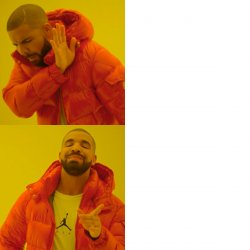
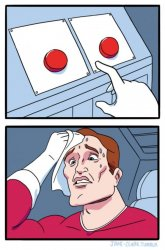
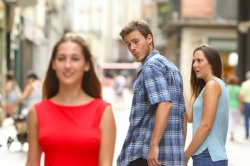

In [23]:
display_df_with_images(df, 3)

In [24]:
df.to_parquet(r'../data/memes_post.parquet')